In [417]:
# install.packages(c('forecast', 'zoo', 'gridExtra', 'fpp3', 'scales', 'Rmisc', 'dplyr', 'lubridate', 'feasts', 'fabletools', 'tsibble', 'fable', 'tidyverse'))


In [418]:
suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(fable))
suppressMessages(library(tsibble))
suppressMessages(library(fabletools))
suppressMessages(library(feasts))
suppressMessages(library(lubridate))
library(dplyr)
suppressMessages(library(Rmisc))
suppressMessages(library(scales))
suppressMessages(library(fpp3))
suppressMessages(library(gridExtra))
suppressMessages(library(zoo))
suppressMessages(library(forecast))
getwd()
setwd('C:/Users/janan/Desktop/jupyter_stuff/690')

[1] "C:/Users/janan/Desktop/jupyter_stuff/690"

In [419]:
data=read.csv('iPhone_Sales.csv')
data <- data %>%
  mutate(Date = as.yearqtr(Time.Period)) %>%
  select(-Time.Period)

# Now rename the columns using backticks because of special characters in the names
data <- data %>%
  mutate(
    Sales = `Sales....millions.`,
    Units = `Units..millions.`,
    Sales_per_unit = `Sales.Per.Unit`
  ) %>%
  select(-Sales....millions.,	-Units..millions.,-Sales.Per.Unit)

whole_data <- data %>% filter(Date < '2019 Q1')
missing_data <- data %>% filter(Date >= '2019 Q1')
whole_data_train <- whole_data %>% filter(Date < '2017 Q1')
whole_data_test <- whole_data %>% filter(Date >= '2017 Q1')



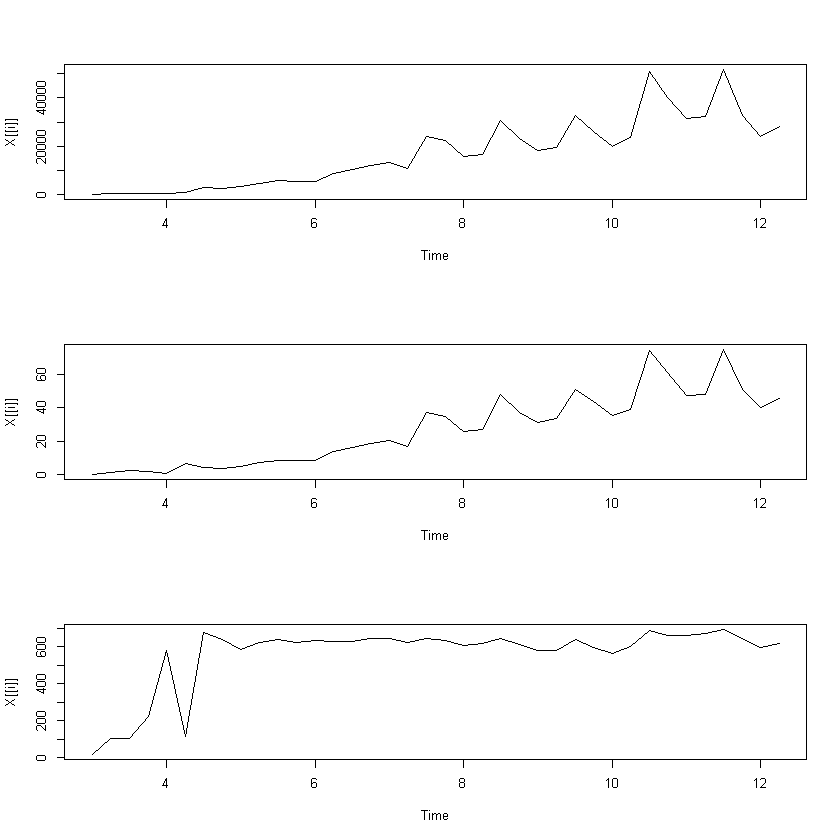

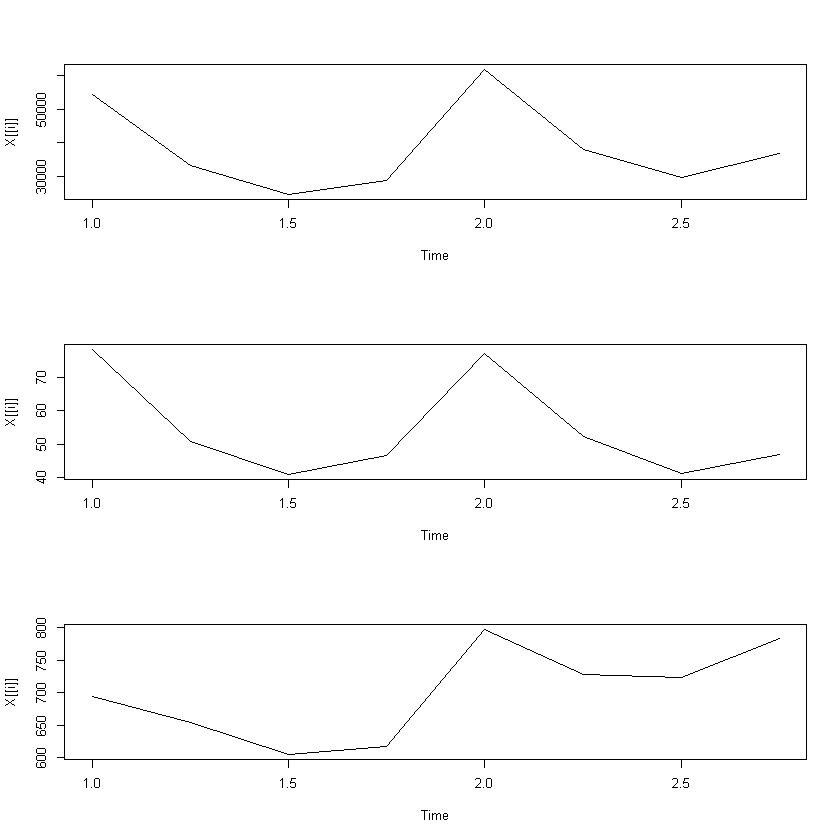

In [420]:
options(warn = -1)
whole_sales_data = ts(
    whole_data_train$Sales,
    start=c(year(whole_data_train$Date[0]) , quarter(whole_data_train$Date[1])),
    frequency = 4
    )
whole_units_data = ts(
    whole_data_train$Units,
    start=c(year(whole_data_train$Date[0]) , quarter(whole_data_train$Date[1])),
    frequency = 4
    )
whole_sales_per_unit_data = ts(
    whole_data_train$Sales_per_unit,
    start=c(year(whole_data_train$Date[0]) , quarter(whole_data_train$Date[1])),
    frequency = 4
    )
whole_sales_data_test= ts(whole_data_test$Sales,start=c(year(whole_data_test$Date[0]),quarter(whole_data_test$Date[1])),frequency = 4)
whole_units_data_test= ts(whole_data_test$Units,start=c(year(whole_data_test$Date[0]),quarter(whole_data_test$Date[1])),frequency = 4)
whole_sales_per_unit_data_test = ts(whole_data_test$Sales_per_unit,start=c(year(whole_data_test$Date[0]),quarter(whole_data_test$Date[1])),frequency=4)
par(mfrow = c(3, 1))
invisible(lapply(list(whole_sales_data, whole_units_data, whole_sales_per_unit_data), plot))
par(mfrow = c(1,1))
par(mfrow = c(3, 1))
invisible(lapply(list(whole_sales_data_test,whole_units_data_test,whole_sales_per_unit_data_test),plot))
par(mfrow = c(1,1))

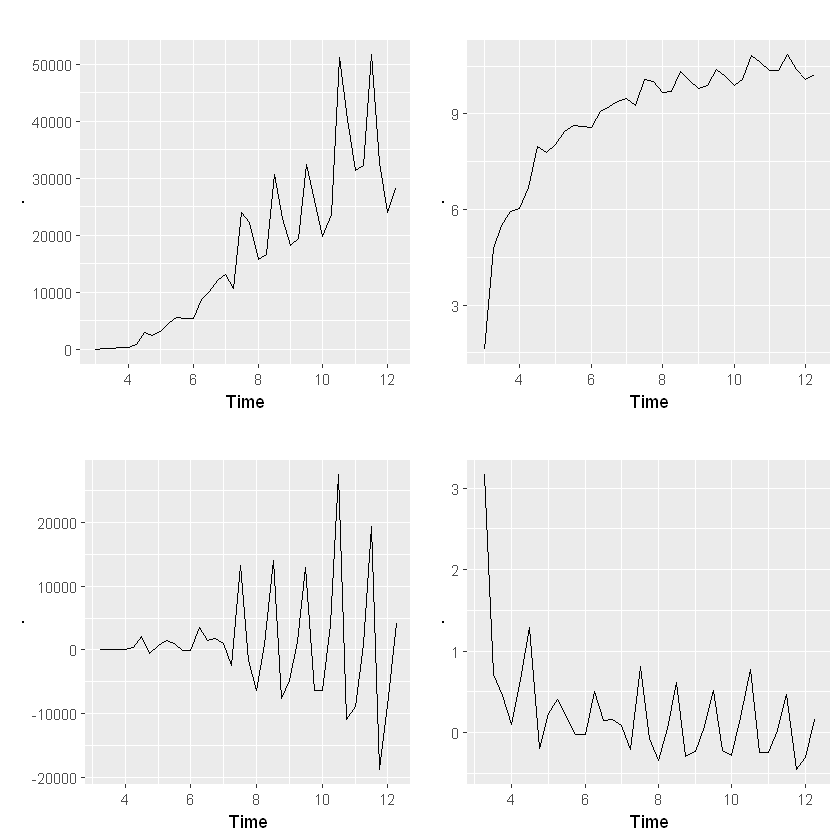

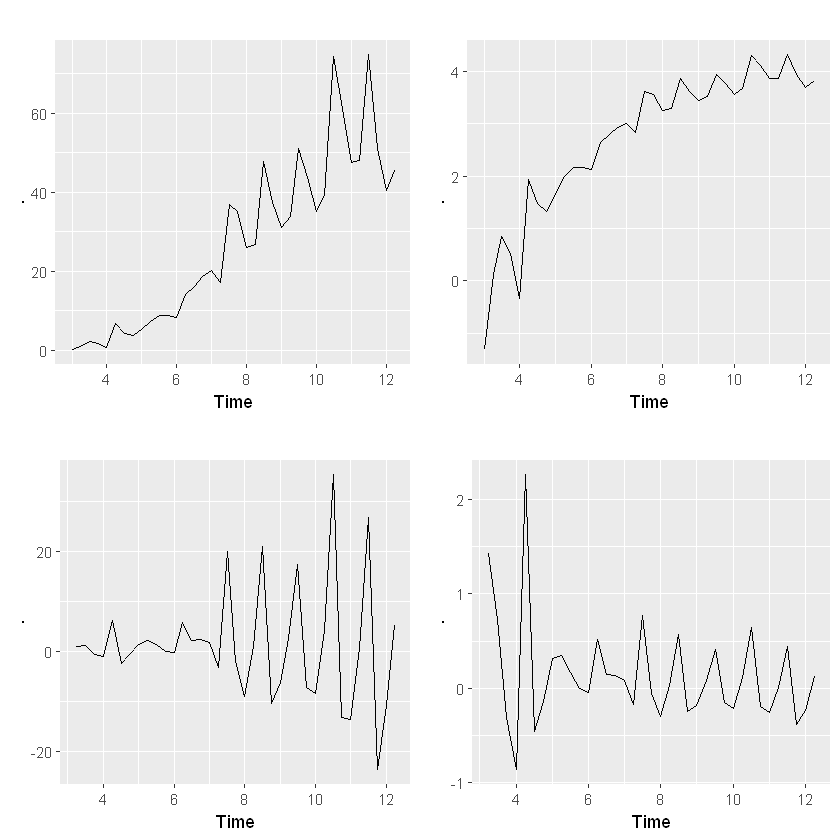

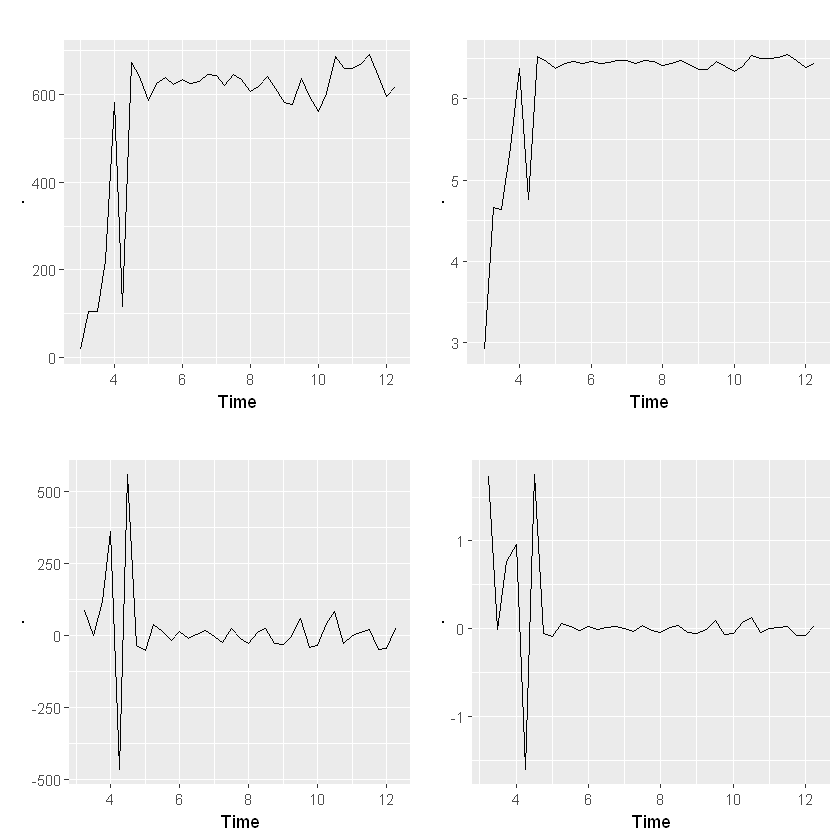

In [421]:

p1 <- whole_sales_data %>% autoplot()
p2 <- whole_sales_data %>% diff() %>% autoplot()
p3 <- whole_sales_data %>% log() %>% autoplot()
p4 <- whole_sales_data %>% log() %>% diff() %>% autoplot()
multiplot(p1,p2,p3,p4,cols=2)


p1 <- whole_units_data %>% autoplot()
p2 <- whole_units_data %>% diff() %>% autoplot()
p3 <- whole_units_data %>% log() %>% autoplot()
p4 <- whole_units_data %>% log() %>% diff() %>% autoplot()
multiplot(p1,p2,p3,p4,cols=2)

p1 <- whole_sales_per_unit_data %>% autoplot()
p2 <- whole_sales_per_unit_data %>% diff() %>% autoplot()
p3 <- whole_sales_per_unit_data %>% log() %>% autoplot()
p4 <- whole_sales_per_unit_data %>% log() %>% diff() %>% autoplot()
multiplot(p1,p2,p3,p4,cols=2)

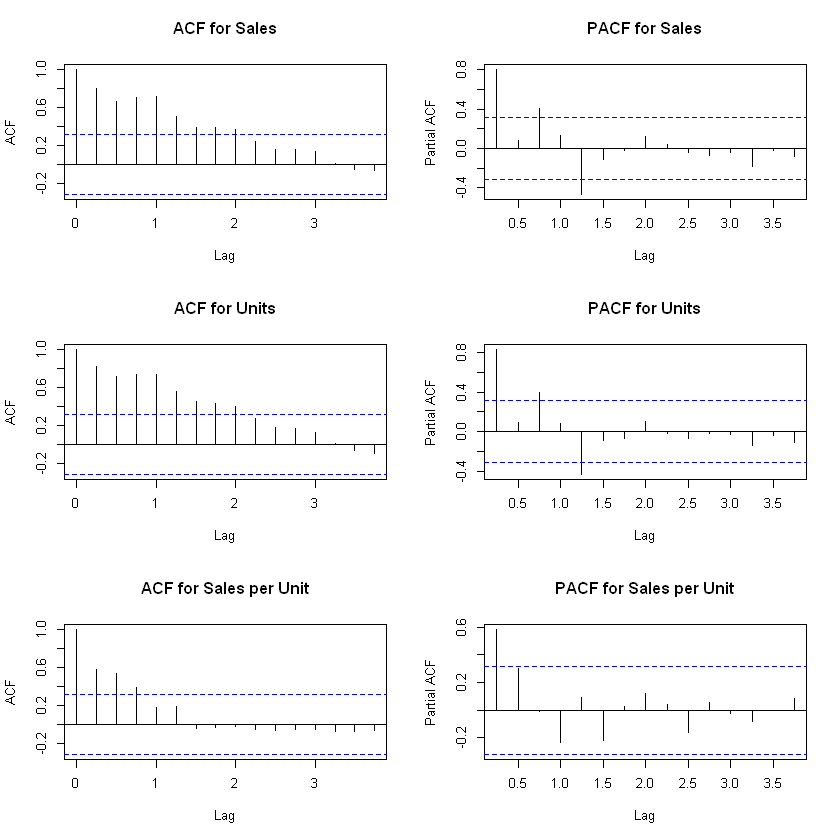

In [422]:
# Assuming you have your time series data in variables like below
# whole_sales_data <- ...
# whole_units_data <- ...
# whole_sales_per_unit_data <- ...

par(mfrow = c(3,2))
# ACF and PACF for Sales
acf(whole_sales_data, main="ACF for Sales")
pacf(whole_sales_data, main="PACF for Sales")

# ACF and PACF for Units
acf(whole_units_data, main="ACF for Units")
pacf(whole_units_data, main="PACF for Units")

# ACF and PACF for Sales per Unit
acf(whole_sales_per_unit_data, main="ACF for Sales per Unit")
pacf(whole_sales_per_unit_data, main="PACF for Sales per Unit")
par(mfrow = c(1,1))

**Total Sales:** This plot indicates the total revenue over time. It seems to exhibit some level of fluctuation, which might be seasonal, given the quarterly data. The pattern does not appear to have a clear trend, suggesting stable sales with potential seasonal peaks.

**Units Sold:** The number of units sold also fluctuates over time. Like total sales, there are peaks and troughs that could correlate with specific quarters, hinting at seasonal purchasing behaviors.

**Sales Per Unit:** The sales per unit plot illustrates the average revenue per unit sold. Variability in this metric can indicate changes in pricing strategies, product mix, or value perception by customers.

For the test data series, the same observations apply. However, the purpose of these plots is to validate our forecasting models by comparing predicted figures against actual historical test data

,Date,Sales,Units,Sales_per_unit
,<yearqtr>,<int>,<dbl>,<dbl>
1,2007 Q3,5,0.27,18.51852
2,2007 Q4,118,1.12,105.35714
3,2008 Q1,241,2.32,103.87931
4,2008 Q2,378,1.70,222.35294
5,2008 Q3,419,0.72,581.94444
6,2008 Q4,806,6.89,116.98113


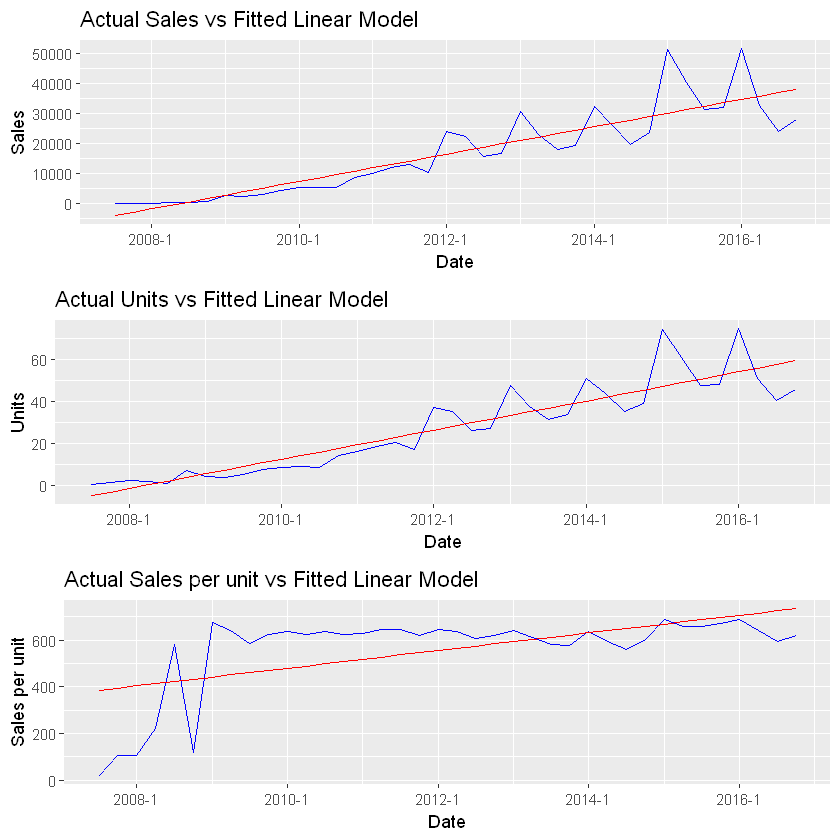

In [423]:
lr_model <- lm(Sales ~ Date, data = whole_data_train)
fitted_values <- data.frame(Date = whole_data_train$Date, Fitted_Sales = fitted(lr_model)) ## creating a data frame for fitted sales vs date
p1 <- ggplot(whole_data_train, aes(x = Date, y = Sales)) +
  geom_line(color = "blue") +
  geom_line(data = fitted_values, aes(x = Date, y = Fitted_Sales), color = "red") +
  labs(title = "Actual Sales vs Fitted Linear Model", x = "Date", y = "Sales")


lr_model <- lm(Units ~ Date, data = whole_data_train)
fitted_values <- data.frame(Date = whole_data_train$Date, Fitted_Sales = fitted(lr_model)) ## creating a data frame for fitted sales vs date
p2 <- ggplot(whole_data_train, aes(x = Date, y = Units)) +
  geom_line(color = "blue") +
  geom_line(data = fitted_values, aes(x = Date, y = Fitted_Sales), color = "red") +
  labs(title = "Actual Units vs Fitted Linear Model", x = "Date", y = "Units")

lr_model <- lm(Sales_per_unit ~ Date, data = whole_data_train)
fitted_values <- data.frame(Date = whole_data_train$Date, Fitted_Sales = fitted(lr_model)) ## creating a data frame for fitted sales vs date
p3 <- ggplot(whole_data_train, aes(x = Date, y = Sales_per_unit)) +
  geom_line(color = "blue") +
  geom_line(data = fitted_values, aes(x = Date, y = Fitted_Sales), color = "red") +
  labs(title = "Actual Sales per unit vs Fitted Linear Model", x = "Date", y = "Sales per unit")

grid.arrange(p1,p2,p3,ncol=1)

whole_data %>% head()

The linear models provide a simplified overview of the sales trends, showing a general direction but not capturing the finer variations in the data. This suggests that while a linear model may be useful for understanding the broad direction of the sales trends, more complex models might be necessary to predict future sales accurately, taking into account seasonal effects and other factors that influence sales dynamics.

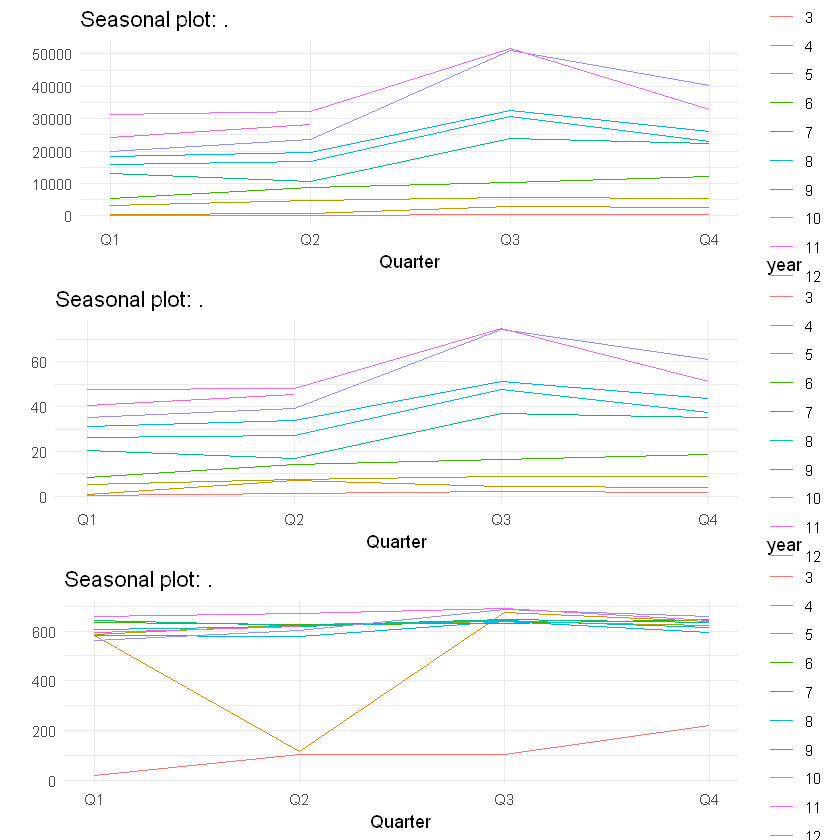

In [424]:
p1<-whole_sales_data %>% ggseasonplot() + theme_minimal()
p2<-whole_units_data %>% ggseasonplot() + theme_minimal()
p3<-whole_sales_per_unit_data %>% ggseasonplot() + theme_minimal()
grid.arrange(p1,p2,p3,ncol=1)

The consistent seasonal patterns across the three metrics suggest a robust seasonal effect on sales activity. Understanding these patterns is crucial for accurate forecasting and strategic planning, such as inventory management, staffing, and marketing efforts. It also indicates that seasonal adjustments may be necessary when modeling sales data to forecast future trends accurately.

[1] "Sales , units, Sales per unit, tslm"


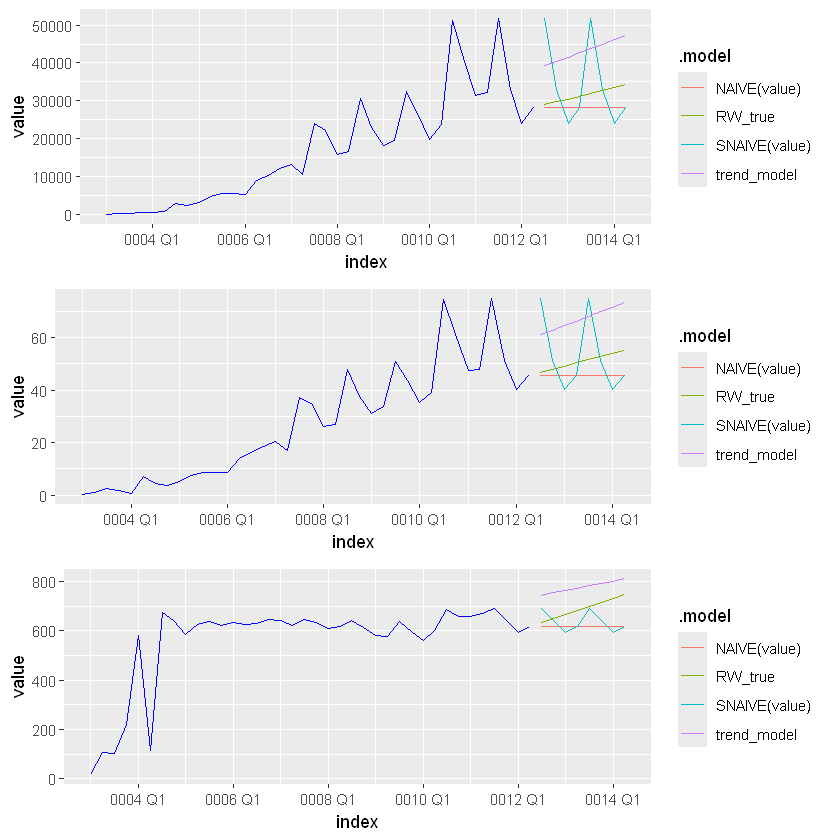

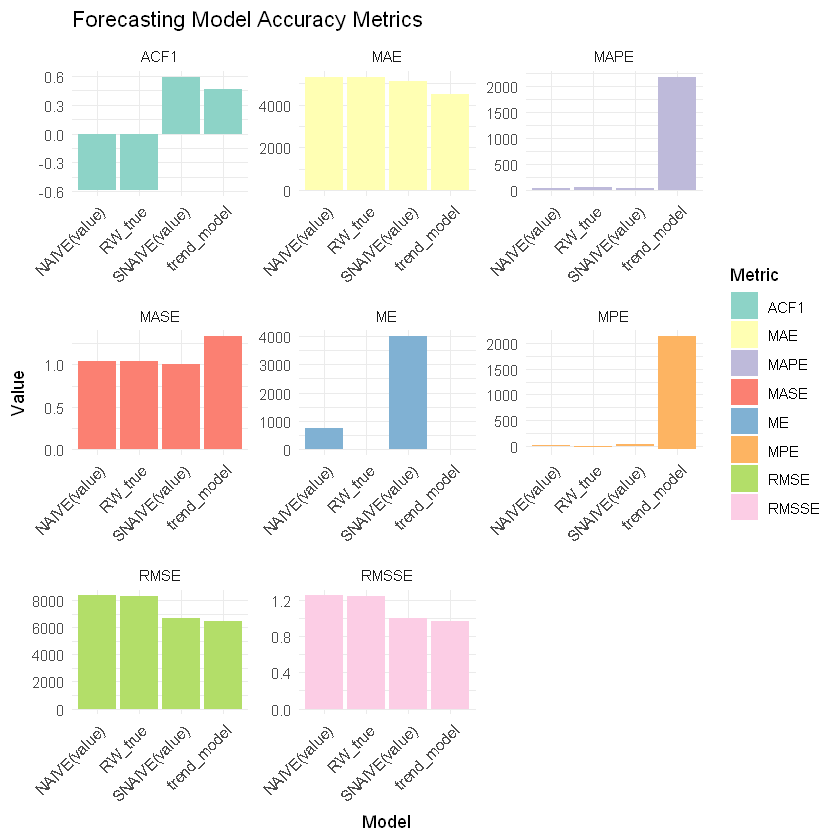

In [425]:
plot_naive_snaive_rw <- function(data) {
  whole_data_tsibble <- data %>% as_tsibble(index = Date)
  fit <- whole_data_tsibble %>%
    model(
      NAIVE(value),
      SNAIVE(value),
      RW_true = RW(value ~ drift(TRUE)),
      trend_model = TSLM(`value` ~ trend())
    )
  future_forecast <- fit %>% forecast(h = "2 years")
  
  p1 <- autoplot(future_forecast, level = NULL) +  # Set level to NULL to remove prediction intervals
    autolayer(whole_data_tsibble, `value`, colour = "blue")
  
  return(list(plt = p1, mdl = fit))
}
print('Sales , units, Sales per unit, tslm')
x <- lapply(list(whole_sales_data, whole_units_data, whole_sales_per_unit_data), plot_naive_snaive_rw)
plots <- lapply(x, function(item) item$plt)
models <- lapply(x, function(item) item$mdl %>% accuracy)
do.call(grid.arrange, c(plots, ncol = 1))
combined_models <- bind_rows(models, .id = "Dataset")

metrics_long <- combined_models %>% 
  pivot_longer(cols = c(ME, RMSE, MAE, MPE, MAPE, MASE, RMSSE, ACF1), names_to = "Metric", values_to = "Value")

ggplot(metrics_long, aes(x = .model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  facet_wrap(~Metric, scales = "free") +
  labs(x = "Model", y = "Value", title = "Forecasting Model Accuracy Metrics") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3") # Use a color palette that is distinguishable


The seasonal decomposition plots break down the time series data into seasonal, trend, and irregular components, offering a granular view of underlying patterns. The consistent shape of the seasonal component year-on-year suggests that specific quarters have a predictable impact on the performance metrics, which can be leveraged for strategic seasonal marketing and stock management.

,Date,Sales,Units,Sales_per_unit
,<yearqtr>,<int>,<dbl>,<dbl>
1,2007 Q3,5,0.27,18.51852
2,2007 Q4,118,1.12,105.35714
3,2008 Q1,241,2.32,103.87931
4,2008 Q2,378,1.70,222.35294
5,2008 Q3,419,0.72,581.94444
6,2008 Q4,806,6.89,116.98113


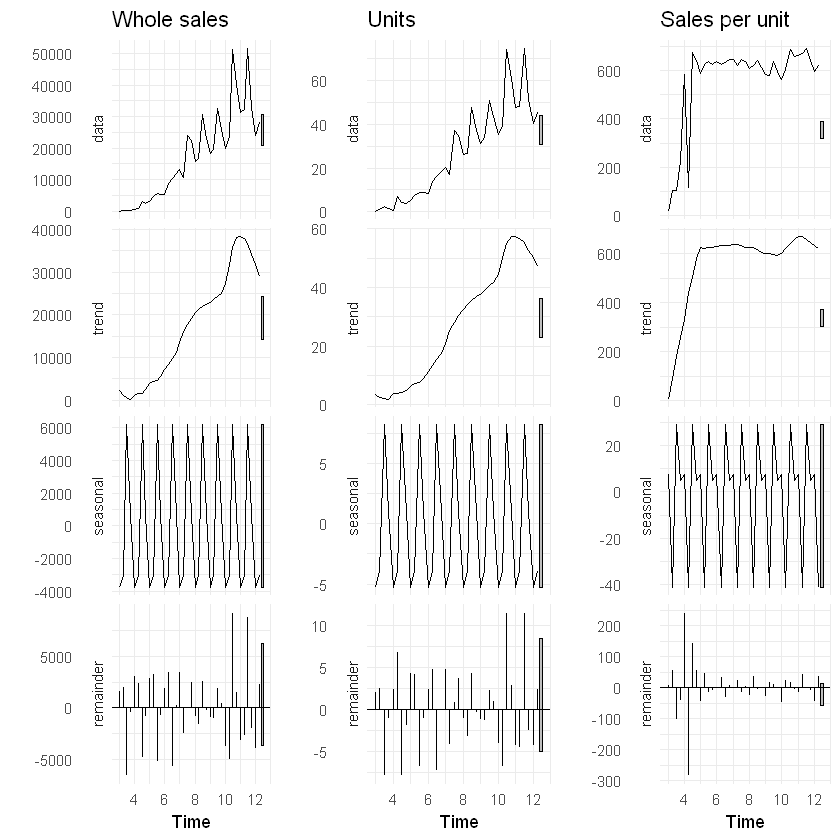

In [426]:
decomposed <- stl(whole_sales_data, s.window = "periodic")
p2 <- autoplot(decomposed) + ggtitle("Whole sales") +  theme_minimal()
decomposed <- stl(whole_units_data, s.window = "periodic")
p4 <- autoplot(decomposed) + ggtitle("Units") +  theme_minimal()
decomposed <- stl(whole_sales_per_unit_data, s.window = "periodic")
p6 <- autoplot(decomposed) + ggtitle("Sales per unit") +  theme_minimal()
grid.arrange(p2,p4,p6,ncol=3)
whole_data %>% head()

The STL decomposition of Whole Sales, Units, and Sales per Unit time series reveals distinct patterns. Whole Sales show a steady growth trend with clear seasonal peaks, suggesting consistent, cyclical sales activities. Units sold also trend upwards with pronounced seasonality, indicating variable yet regular sales volumes. Sales per Unit initially spike, then level off, with strong seasonal swings suggesting fluctuating prices or profitability. The remainder components across all datasets suggest that trends and seasonality capture most variations, with only minor unexplained anomalies. These insights are crucial for informed forecasting and strategic planning in response to the identified cyclical sales patterns.


For the sales and units, the seasonality indicates that certain quarters consistently outperform others, which is typical in retail due to factors like holiday seasons or fiscal year ends.
The sales per unit data does not show a clear seasonal pattern, which suggests that the average price per unit sold may vary due to reasons not tied to the calendar or seasons, such as changes in product mix, pricing strategies, or promotional activities.

,Date,Sales,Units,Sales_per_unit
,<qtr>,<int>,<dbl>,<dbl>
1,2007 Q3,5,0.27,18.51852
2,2007 Q4,118,1.12,105.35714
3,2008 Q1,241,2.32,103.87931
4,2008 Q2,378,1.70,222.35294
5,2008 Q3,419,0.72,581.94444
6,2008 Q4,806,6.89,116.98113


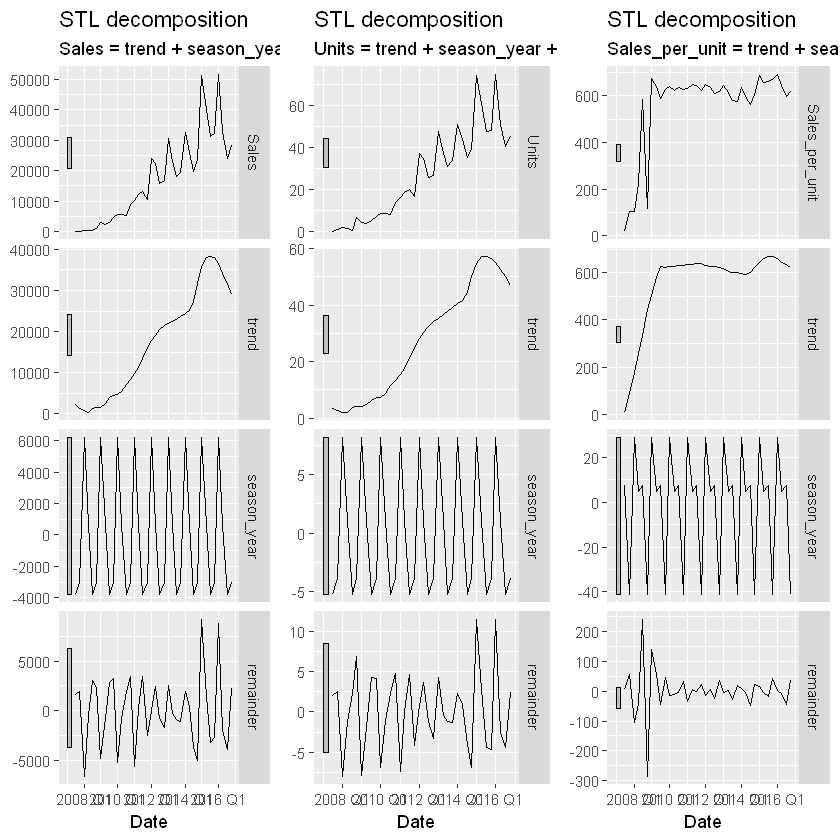

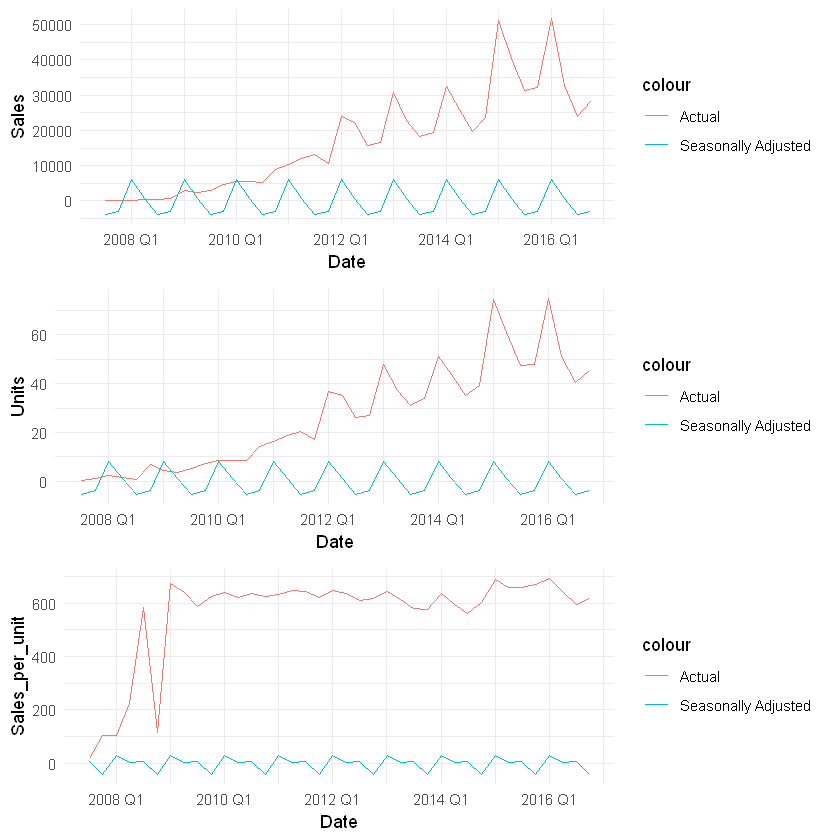

In [427]:
whole_data_train <- whole_data_train %>%  mutate(Date = yearquarter(Date))
whole_data_train %>% head()
p1 <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Sales`) %>%  model(STL(`Sales` ~ season(window = "periodic"))) %>%  components() %>% autoplot()
sales_stl <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Sales`) %>%  model(STL(`Sales` ~ season(window = "periodic")))
components <- sales_stl %>%  components() %>%  mutate(Seasonally_Adjusted = Sales - season_adjust)
p2 <- ggplot() +
  geom_line(data = components, aes(x = Date, y = Sales, color = "Actual")) +
  geom_line(data = components, aes(x = Date, y = Seasonally_Adjusted, color = "Seasonally Adjusted")) +
  theme_minimal()

p3 <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Units`) %>%  model(STL(`Units` ~ season(window = "periodic"))) %>%  components() %>% autoplot()
# as_tsibble(whole_data_train, index = Date) %>% log() %>% diff() %>%   select(Date, `Units`) %>%  model(STL(`Units` ~ season(window = "periodic"))) %>%  components() %>% autoplot()
sales_stl <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Units`) %>%  model(STL(Units ~ season(window = "periodic")))
# units_log_diff_stl <- as_tsibble(whole_data_train, index = Date) %>% log() %>% diff() %>%   select(Date, `Units`) %>%  model(STL(Units ~ season(window = "periodic")))
components <- sales_stl %>%  components() %>%  mutate(Seasonally_Adjusted = Units - season_adjust)
# components_log_diff <- units_log_diff_stl %>%  components() %>%  mutate(Seasonally_Adjusted = Units - season_adjust)
p4 <- ggplot() +
  geom_line(data = components, aes(x = Date, y = Units, color = "Actual")) +
  geom_line(data = components, aes(x = Date, y = Seasonally_Adjusted, color = "Seasonally Adjusted")) +
  theme_minimal()



p5 <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Sales_per_unit`) %>%  model(STL(`Sales_per_unit` ~ season(window = "periodic"))) %>%  components() %>% autoplot()
sales_stl <- as_tsibble(whole_data_train, index = Date) %>%   select(Date, `Sales_per_unit`)  %>%  model(STL(Sales_per_unit ~ season(window = "periodic")))
components <- sales_stl %>%  components() %>%  mutate(Seasonally_Adjusted = Sales_per_unit - season_adjust)
p6 <- ggplot() +
  geom_line(data = components, aes(x = Date, y = Sales_per_unit, color = "Actual")) +
  geom_line(data = components, aes(x = Date, y = Seasonally_Adjusted, color = "Seasonally Adjusted")) +
  theme_minimal()

grid.arrange(p1,p3,p5,ncol=3)
grid.arrange(p2,p4,p6,ncol=1)

In the time series analysis of sales data, the STL decomposition is employed to decompose the series into seasonal, trend, and residual components. This allows for a clearer understanding of the underlying patterns.

1. **Whole Sales Analysis:**
   The 'Whole sales' decomposition reveals a clear upward trend over time, indicating a general increase in sales. Seasonal fluctuations are consistent, with periodic spikes which could reflect seasonal buying behaviors. The residuals do not show any obvious patterns, suggesting that the model captures the seasonality and trend well.

2. **Units Sold Analysis:**
   For 'Units', there is a gradual increasing trend similar to sales, but with less pronounced seasonal variation. The stability of the residuals again suggests that the seasonal and trend components are well captured by the STL decomposition.

3. **Sales Per Unit Analysis:**
   The 'Sales per unit' data exhibits a less clear trend, possibly due to higher volatility in pricing or unit costs over time. Seasonal patterns are less regular than in the sales data, and larger residuals indicate potential for model refinement or the presence of outliers affecting the data.

Considering these analyses, while the models capture overall trends and seasonality, the residuals—especially in 'Sales per unit'—indicate areas where model performance could be improved, possibly by accounting for additional variables or anomalies in the data.

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
snaive_log_diff,Training,-3.136786e-02,0.5271835,0.3262735,444.64641,556.6270,1.0000000,1.0000000,-0.5655164
trend_log_diff,Training,-3.225062e-17,0.5237899,0.3658703,-464.94424,715.1200,1.1213607,0.9935628,-0.2986816
seasonal_trend_log_diff,Training,2.849987e-17,0.4331560,0.2962980,22.87371,329.4998,0.9081277,0.8216418,-0.4710425


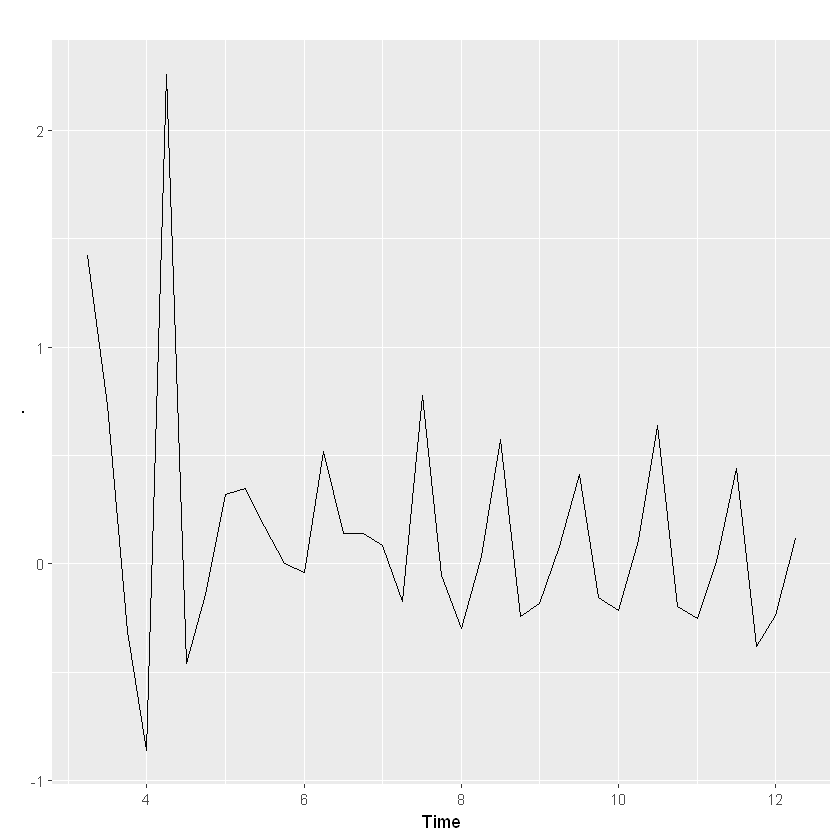

In [428]:
# whole_sales_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% gg_tsresiduals()
# whole_units_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% gg_tsresiduals()
# whole_units_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value), trend = TSLM(`value` ~ trend()), seasonal_trend = TSLM(`value` ~ season()+trend())) %>% accuracy()
# whole_sales_per_unit_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% gg_tsresiduals()

# print("Residuals of trend model sales vs units vs sales per unit")
# whole_sales_data %>% as_tsibble(index=Date) %>% model(tlsm = TSLM(`value` ~ trend())) %>% gg_tsresiduals()
# whole_units_data %>% as_tsibble(index=Date) %>% model(tlsm = TSLM(`value` ~ trend())) %>% gg_tsresiduals()
# # whole_sales_per_unit_data %>% as_tsibble(index=Date) %>% model(tlsm = TSLM(`value` ~ trend())) %>% gg_tsresiduals()
# whole_units_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value), trend = TSLM(`value` ~ trend()), seasonal_trend = TSLM(`value` ~ season()+trend())) %>% accuracy()
# whole_units_data %>% diff() %>% as_tsibble(index=Date) %>% model(snaive_diff = SNAIVE(value), trend_diff = TSLM(`value` ~ trend()), seasonal_trend_diff = TSLM(`value` ~ season()+trend())) %>% accuracy()
# whole_units_data %>% log() %>% as_tsibble(index=Date) %>% model(snaive_log = SNAIVE(value), trend_log = TSLM(`value` ~ trend()), seasonal_trend_log = TSLM(`value` ~ season()+trend())) %>% accuracy()
# whole_units_data %>% diff() %>% log() %>% as_tsibble(index=Date) %>% model(snaive_diff_log = SNAIVE(value), trend_diff_log = TSLM(`value` ~ trend()), seasonal_trend_diff_log = TSLM(`value` ~ season()+trend())) %>% accuracy()
whole_units_data %>% log() %>% diff() %>% as_tsibble(index=Date) %>% model(snaive_log_diff = SNAIVE(value), trend_log_diff = TSLM(`value` ~ trend()), seasonal_trend_log_diff = TSLM(`value` ~ season()+trend())) %>% accuracy()
# whole_units_data %>% diff() %>% log() %>% autoplot()
whole_units_data %>% log() %>% diff() %>% autoplot()

# whole_data %>% head()


Between the SNAIVE and trend models, the SNAIVE model appears to accommodate the seasonality effectively, as seen in the residuals. However, the trend model, despite capturing the long-term movement, may not be as robust in handling sudden changes or seasonal effects, as evidenced by the residual plots. Therefore, for consistent seasonality patterns, SNAIVE may be preferable, but for data with a clear trend component, a combination or a more complex model might be necessary to improve accuracy.

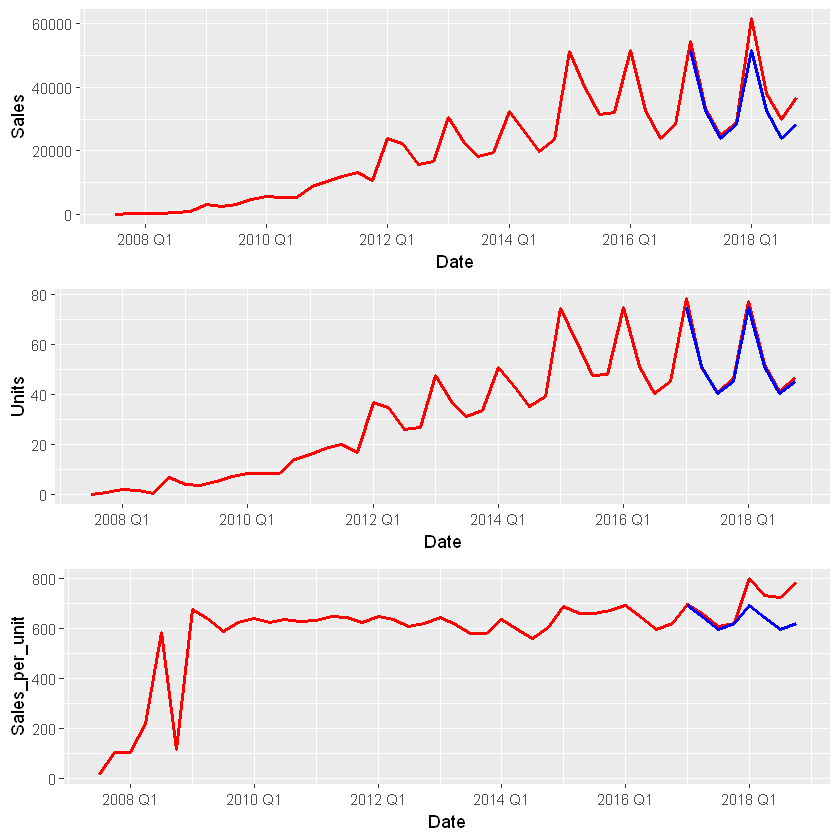

In [429]:
old_test_data <- whole_data_test
df1 <- whole_sales_per_unit_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% forecast(h="2 years")  %>% mutate(MeanForecast = `.mean`) 
df1 = as.data.frame(df1)
whole_data_test$Sales_per_unit <-  df1 %>% mutate(Sales_per_unit = MeanForecast) %>% select(Sales_per_unit)  

df1 <- whole_units_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% forecast(h="2 years")  %>% mutate(MeanForecast = `.mean`) 
df1 = as.data.frame(df1)
whole_data_test$Units <-  df1  %>% mutate(Units = MeanForecast) %>% select(Units) 


df1 <- whole_sales_data %>% as_tsibble(index=Date) %>% model(SNAIVE(value)) %>% forecast(h="2 years")  %>% mutate(MeanForecast = `.mean`) 
df1 = as.data.frame(df1)
whole_data_test$Sales <- df1  %>% mutate(Sales = MeanForecast) %>% select(Sales)

whole_data_test$Sales <- unlist(whole_data_test$Sales)
whole_data_test$Units <- unlist(whole_data_test$Units)
whole_data_test$Sales_per_unit <- unlist(whole_data_test$Sales_per_unit)

whole_data_test <- whole_data_test %>% mutate(Date=yearquarter(Date))
whole_data <- whole_data %>% mutate(Date = yearquarter(Date))

p1 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Sales),color='red',size=1) +
    geom_line(data = whole_data_test, aes(x = Date,y = Sales), color='blue', size = 1)

p2 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Units),color='red',size=1) +
    geom_line(data = whole_data_test, aes(x = Date,y = Units), color='blue', size = 1)

p3 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Sales_per_unit),color='red',size=1) +
    geom_line(data = whole_data_test, aes(x = Date,y = Sales_per_unit), color='blue', size = 1)

grid.arrange(p1,p2,p3,ncol=1)

The consistency of the model with the historical data suggests the model's potential effectiveness in short-term forecasting where seasonal patterns are strong and consistent. However, the model might not account for non-seasonal trends or any changes in the underlying data generation process. This analysis emphasizes the need for careful model selection and validation when dealing with time series forecasts.

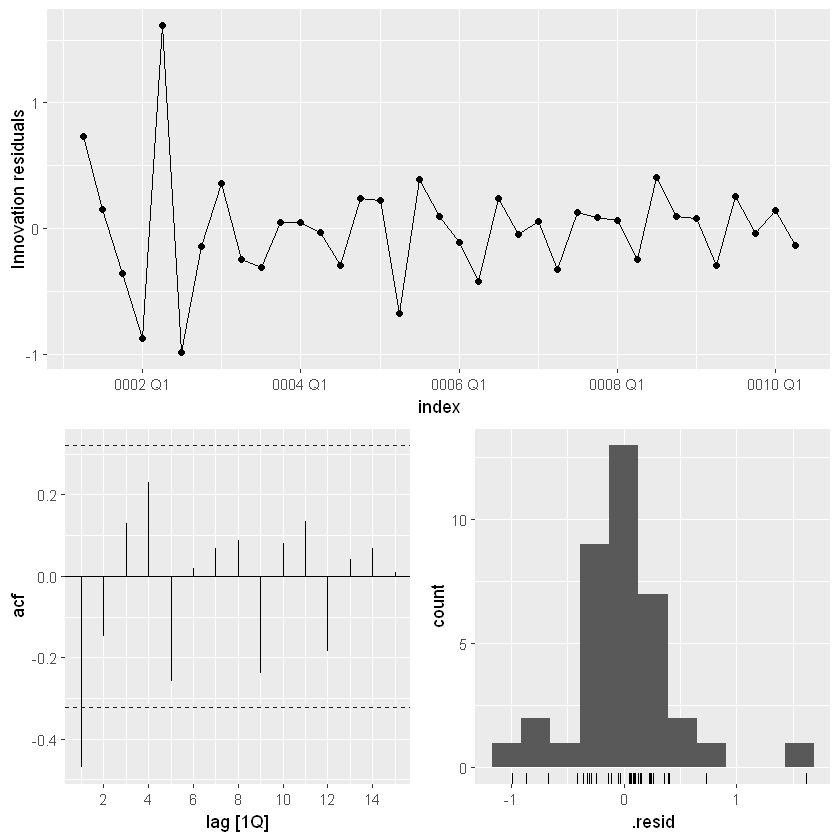

In [430]:
# ts(whole_data_train$Sales, frequency = 4) %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season())) %>% gg_tsresiduals()
ts(whole_data_train$Units, frequency = 4) %>% log() %>% diff() %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season())) %>% gg_tsresiduals()
# ts(whole_data_train$Sales_per_unit, frequency = 4) %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season())) %>% gg_tsresiduals()

In [431]:
# fit <- ts(whole_data_train$Sales, frequency = 4) %>% log() %>% diff() %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season()))
# frcst <- fit %>% forecast(h = 4*2)
# whole_data_test$Forecasted_Sales_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_sales_seasonal_trend'='.mean') %>% select(Forecasted_sales_seasonal_trend) %>% unlist()

# fit <- ts(whole_data_train$Units, frequency = 4) %>% log() %>% diff() %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season()))
# frcst <- fit %>% forecast(h = 4*2)
# whole_data_test$Forecasted_Units_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% rename('Forecasted_Units_seasonal_trend'='.mean') %>% select(Forecasted_Units_seasonal_trend) %>% unlist()


# fit <- ts(whole_data_train$Sales_per_unit, frequency = 4) %>% log() %>% diff() %>% as_tsibble(index=Date) %>% model(`Seasonal Trend` = TSLM(value ~ trend() + season()))
# frcst <- fit %>% forecast(h = 4*2)
# whole_data_test$Forecasted_Sales_per_unit_seasonal_trend <- whole_data_test$Forecasted_Sales_seasonal_trend / whole_data_test$Forecasted_Units_seasonal_trend


# whole_data_test %>% head()

Using Fitted Sales and Units to derive Sales per unit column. We're using seasonal Trend on log transformed data here by the way

In [432]:
fit_sales <- ts(whole_data_train$Sales, frequency = 4) %>%  log() %>%  diff() %>%  as_tsibble(index=Date) %>%  model(`Seasonal Trend` = TSLM(value ~ trend() + season()))
frcst_sales <- fit_sales %>% forecast(h = 4*2)
whole_data_test$Forecasted_Sales_seasonal_trend <- frcst_sales %>%   filter(.model == 'Seasonal Trend') %>%  pull(.mean)

# Convert to tsibble, log transform, difference, model, and forecast for Units
fit_units <- ts(whole_data_train$Units, frequency = 4) %>%  log() %>% diff() %>%  as_tsibble(index=Date) %>%  model(`Seasonal Trend` = TSLM(value ~ trend() + season()))
frcst_units <- fit_units %>% forecast(h = 4*2)
whole_data_test$Forecasted_Units_seasonal_trend <- frcst_units %>%   filter(.model == 'Seasonal Trend') %>%   pull(.mean)

# Calculate Sales per unit from the forecasts
whole_data_test$Forecasted_Sales_per_unit_seasonal_trend <- whole_data_test$Forecasted_Sales_seasonal_trend / whole_data_test$Forecasted_Units_seasonal_trend

# View the head of the modified test data
head(whole_data_test)


,Date,Sales,Units,Sales_per_unit,Forecasted_Sales_seasonal_trend,Forecasted_Units_seasonal_trend,Forecasted_Sales_per_unit_seasonal_trend
,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017 Q1,51635,74.78,690.4921,0.104221687,0.13693296,0.7611147
2,2017 Q2,32857,51.19,641.8636,-0.607328817,-0.39271075,1.5465042
3,2017 Q3,24048,40.40,595.2475,-0.623118126,-0.43028670,1.4481464
4,2017 Q4,28160,45.51,618.7651,-0.060461527,0.20415460,-0.2961556
5,2018 Q1,51635,74.78,690.4921,0.002238201,0.08819454,0.0253780
6,2018 Q2,32857,51.19,641.8636,-0.709312304,-0.44144917,1.6067814


,Date,Sales,Units,Sales_per_unit
,<qtr>,<int>,<dbl>,<dbl>
1,2007 Q3,5,0.27,18.51852
2,2007 Q4,118,1.12,105.35714
3,2008 Q1,241,2.32,103.87931
4,2008 Q2,378,1.70,222.35294
5,2008 Q3,419,0.72,581.94444
6,2008 Q4,806,6.89,116.98113


,Date,Sales,Units,Sales_per_unit,Log_Diff_Sales,Log_Diff_Units,Log_Diff_Sales_per_unit
,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007 Q3,NA,NA,NA,NA,NA,NA
2,2007 Q4,3.1612467,1.4226620,1.73858471,3.1612467,1.4226620,1.73858471
3,2008 Q1,0.7141123,0.7282385,-0.01412619,0.7141123,0.7282385,-0.01412619
4,2008 Q2,0.4500973,-0.3109389,0.76103620,0.4500973,-0.3109389,0.76103620
5,2008 Q3,0.1029767,-0.8591323,0.96210904,0.1029767,-0.8591323,0.96210904
6,2008 Q4,0.6542128,2.2585752,-1.60436233,0.6542128,2.2585752,-1.60436233


[1] "Plot for log differenced data vs seasonal trend forecast .. "


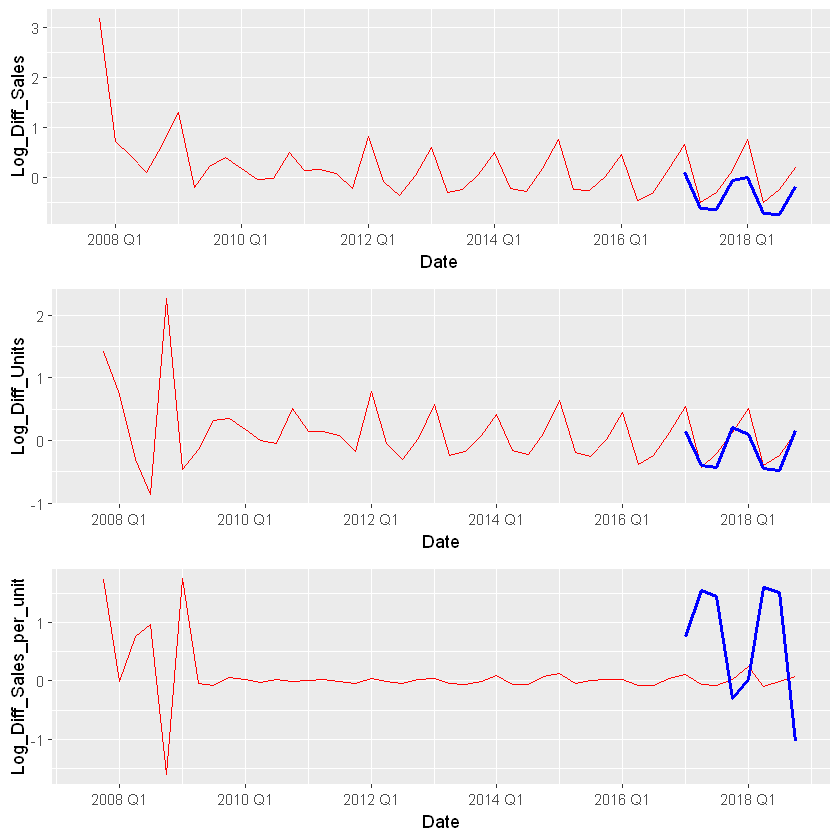

In [433]:
whole_data %>% head()
whole_data <- whole_data %>% mutate(Log_Diff_Sales = c(NA,diff(log(Sales))))
whole_data <- whole_data %>% mutate(Log_Diff_Units = c(NA,diff(log(Units))))
whole_data <- whole_data %>% mutate(Log_Diff_Sales_per_unit = c(NA,diff(log(Sales_per_unit))))

whole_data$Sales <- whole_data$Log_Diff_Sales
whole_data$Units <- whole_data$Log_Diff_Units
whole_data$Sales_per_unit <- whole_data$Log_Diff_Sales_per_unit

whole_data %>% head()
p1 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Log_Diff_Sales),color='red') +
    geom_line(data = whole_data_test, aes(x = Date,y = Forecasted_Sales_seasonal_trend), color='blue', size = 1)

p2 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Log_Diff_Units),color='red') +
    geom_line(data = whole_data_test, aes(x = Date,y = Forecasted_Units_seasonal_trend), color='blue', size = 1)

p3 <- ggplot()+
    geom_line(data = whole_data, aes(x=Date,y = Log_Diff_Sales_per_unit),color='red') +
    geom_line(data = whole_data_test, aes(x = Date,y = Forecasted_Sales_per_unit_seasonal_trend), color='blue', size = 1)

print('Plot for log differenced data vs seasonal trend forecast .. ')
grid.arrange(p1,p2,p3,ncol=1)

In [434]:
whole_data_test$Sales <- whole_data_test$Forecasted_Sales_seasonal_trend
whole_data_test$Units <- whole_data_test$Forecasted_Units_seasonal_trend
whole_data_test$Sales_per_unit <- whole_data_test$Forecasted_Sales_per_unit_seasonal_trend

whole_data_test$Forecasted_Sales_seasonal_trend <- NULL
whole_data_test$Forecasted_Units_seasonal_trend <- NULL
whole_data_test$Forecasted_Sales_per_unit_seasonal_trend <- NULL

whole_data_test

Date,Sales,Units,Sales_per_unit
<qtr>,<dbl>,<dbl>,<dbl>
2017 Q1,0.104221687,0.13693296,0.7611147
2017 Q2,-0.607328817,-0.39271075,1.5465042
2017 Q3,-0.623118126,-0.43028670,1.4481464
2017 Q4,-0.060461527,0.20415460,-0.2961556
2018 Q1,0.002238201,0.08819454,0.0253780
2018 Q2,-0.709312304,-0.44144917,1.6067814
2018 Q3,-0.725101612,-0.47902512,1.5137027
2018 Q4,-0.162445013,0.15541618,-1.0452259


In [435]:
# whole_data_train
whole_data_train <- whole_data_train %>% mutate(Log_Diff_Sales = c(NA,diff(log(Sales))))
whole_data_train <- whole_data_train %>% mutate(Log_Diff_Units = c(NA,diff(log(Units))))
whole_data_train <- whole_data_train %>% mutate(Log_Diff_Sales_per_unit = c(NA,diff(log(Sales_per_unit))))
whole_data_train$Sales <- whole_data_train$Log_Diff_Sales
whole_data_train$Units <- whole_data_train$Log_Diff_Units
whole_data_train$Sales_per_unit <- whole_data_train$Log_Diff_Sales_per_unit

whole_data_train <- whole_data_train %>% select(-Log_Diff_Sales, -Log_Diff_Units, -Log_Diff_Sales_per_unit)


In [436]:
combined_data <- rbind(whole_data_train,whole_data_test)
write.csv(combined_data,'train_forecasted_test_2007_2018.csv')

write.csv(missing_data,'data_2019_2023.csv')

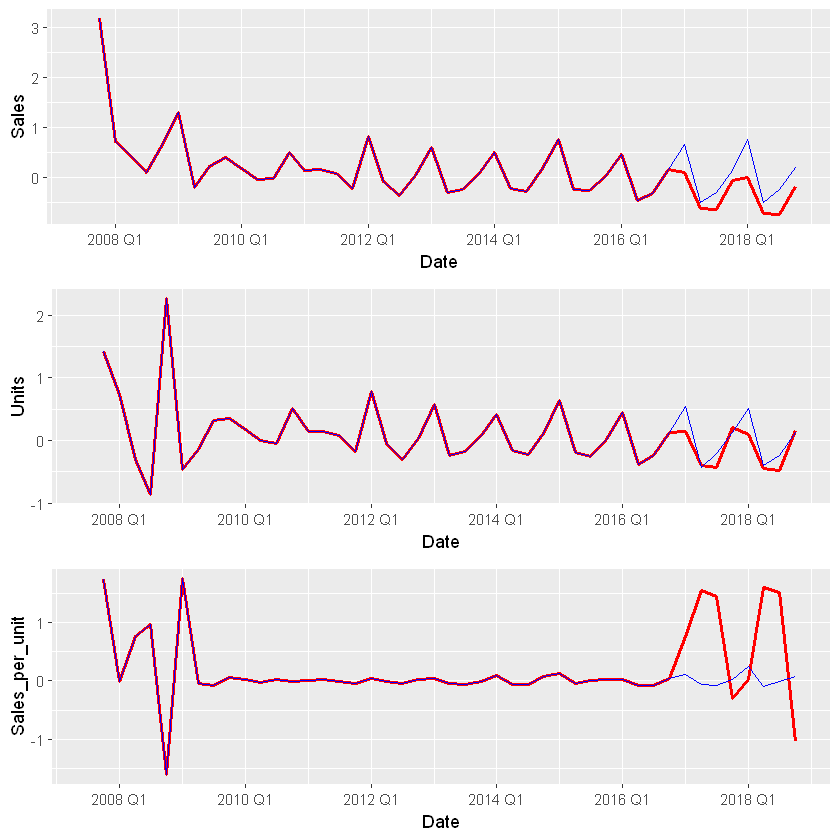

In [437]:


p1 <- ggplot()+
    geom_line(data = combined_data,aes(x = Date,y = Sales), color = 'red', size = 1) + 
    geom_line(data = whole_data,aes(x = Date,y = Log_Diff_Sales), color = 'blue')

p2 <- ggplot()+
    geom_line(data = combined_data,aes(x = Date,y = Units), color = 'red', size = 1) +
    geom_line(data = whole_data,aes(x = Date,y = Log_Diff_Units), color = 'blue') 

p3 <- ggplot()+
    geom_line(data = combined_data,aes(x = Date,y = Sales_per_unit), color = 'red', size = 1) + 
    geom_line(data = whole_data,aes(x = Date,y = Log_Diff_Sales_per_unit), color = 'blue')

grid.arrange(p1,p2,p3,ncol = 1)


The seasonal trend model seems to capture the overall trend and seasonal patterns in the data, which is a positive indication of its predictive capability. However, the discrepancies at certain points suggest room for model refinement, possibly by adjusting model parameters, incorporating additional explanatory variables, or exploring different forecasting techniques to improve the fit to the actual data.

In [438]:
data = read.csv('train_forecasted_test_2007_2018.csv')

data_to_forecast = read.csv('data_2019_2023.csv')

data$X <- NULL
data_to_forecast$X <- NULL
data <- data %>% mutate(Date =yearquarter( as.yearqtr(Date, format = '%Y Q%q')))
data_to_forecast <- data_to_forecast %>% mutate(Date = yearquarter(as.yearqtr(Date, format = '%Y Q%q')))

data %>% head()
data_to_forecast %>% head()

,Date,Sales,Units,Sales_per_unit
,<qtr>,<dbl>,<dbl>,<dbl>
1,2007 Q3,NA,NA,NA
2,2007 Q4,3.1612467,1.4226620,1.73858471
3,2008 Q1,0.7141123,0.7282385,-0.01412619
4,2008 Q2,0.4500973,-0.3109389,0.76103620
5,2008 Q3,0.1029767,-0.8591323,0.96210904
6,2008 Q4,0.6542128,2.2585752,-1.60436233


,Date,Sales,Units,Sales_per_unit
,<qtr>,<int>,<lgl>,<lgl>
1,2019 Q1,51982,NA,NA
2,2019 Q2,31051,NA,NA
3,2019 Q3,25986,NA,NA
4,2019 Q4,33362,NA,NA
5,2020 Q1,55957,NA,NA
6,2020 Q2,28962,NA,NA


In [439]:
data %>% head()
fit <- ts(data$Units, frequency = 4)  %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
# fit <- ts(data$Units, frequency = 4)%>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Units_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% mutate(Forecasted_Units_trend=`.mean`) %>% select(Forecasted_Units_trend) %>% unlist()
data_to_forecast$Forecasted_Units_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% mutate(Forecasted_Units_seasonal_trend=`.mean`) %>% select(Forecasted_Units_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Units_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% mutate(Forecasted_Units_snaive=`.mean`) %>% select(Forecasted_Units_snaive) %>% unlist()
data_to_forecast %>% head()


,Date,Sales,Units,Sales_per_unit
,<qtr>,<dbl>,<dbl>,<dbl>
1,2007 Q3,NA,NA,NA
2,2007 Q4,3.1612467,1.4226620,1.73858471
3,2008 Q1,0.7141123,0.7282385,-0.01412619
4,2008 Q2,0.4500973,-0.3109389,0.76103620
5,2008 Q3,0.1029767,-0.8591323,0.96210904
6,2008 Q4,0.6542128,2.2585752,-1.60436233


,Date,Sales,Units,Sales_per_unit,Forecasted_Units_trend,Forecasted_Units_seasonal_trend,Forecasted_Units_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,-0.2101522,0.039456118,0.08819454
2,2019 Q2,31051,NA,NA,-0.2231236,-0.490187592,-0.44144917
3,2019 Q3,25986,NA,NA,-0.2360949,-0.527763538,-0.47902512
4,2019 Q4,33362,NA,NA,-0.2490663,0.106677758,0.15541618
5,2020 Q1,55957,NA,NA,-0.2620376,-0.009282303,0.08819454
6,2020 Q2,28962,NA,NA,-0.2750089,-0.538926013,-0.44144917


In [440]:
data_to_forecast$Sales_per_unit_trend = c(NA,diff(log(data_to_forecast$Sales)))/data_to_forecast$Forecasted_Units_trend
data_to_forecast$Sales_per_unit_seasonal_trend = c(NA,diff(log(data_to_forecast$Sales)))/data_to_forecast$Forecasted_Units_seasonal_trend
data_to_forecast$Sales_per_unit_snaive = c(NA,diff(log(data_to_forecast$Sales)))/data_to_forecast$Forecasted_Units_snaive
forecasted_data <- data_to_forecast

forecasted_data$Units_trend <- forecasted_data$Forecasted_Units_trend
forecasted_data$Units_seasonal_trend <- forecasted_data$Forecasted_Units_seasonal_trend
forecasted_data$Units_snaive <- forecasted_data$Forecasted_Units_snaive
forecasted_data$Forecasted_Units_trend <- NULL
forecasted_data$Forecasted_Units_seasonal_trend <- NULL
forecasted_data$Forecasted_Units_snaive <- NULL
forecasted_data %>% head()

,Date,Sales,Units,Sales_per_unit,Sales_per_unit_trend,Sales_per_unit_seasonal_trend,Sales_per_unit_snaive,Units_trend,Units_seasonal_trend,Units_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,NA,NA,NA,-0.2101522,0.039456118,0.08819454
2,2019 Q2,31051,NA,NA,2.3093324,1.0511618,1.1672159,-0.2231236,-0.490187592,-0.44144917
3,2019 Q3,25986,NA,NA,0.7542436,0.3374107,0.3717406,-0.2360949,-0.527763538,-0.47902512
4,2019 Q4,33362,NA,NA,-1.0031853,2.3421902,1.6076807,-0.2490663,0.106677758,0.15541618
5,2020 Q1,55957,NA,NA,-1.9736328,-55.7152719,5.8639234,-0.2620376,-0.009282303,0.08819454
6,2020 Q2,28962,NA,NA,2.3948272,1.2220581,1.4919020,-0.2750089,-0.538926013,-0.44144917


In [441]:
forecasted_data <- forecasted_data %>% mutate(Log_Diff_Sales = c(NA,diff(log(Sales))))
forecasted_data$Sales <- forecasted_data$Log_Diff_Sales

In [442]:
fit <- ts(data$Sales, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Sales_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% mutate(Forecasted_sales_trend=`.mean`) %>% select(Forecasted_sales_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% mutate(Forecasted_sales_seasonal_trend=`.mean`) %>% select(Forecasted_sales_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% mutate(Forecasted_sales_snaive=`.mean`) %>% select(Forecasted_sales_snaive) %>% unlist()


fit <- ts(data$Units, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Units_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% mutate(Forecasted_Units_trend=`.mean`) %>% select(Forecasted_Units_trend) %>% unlist()
data_to_forecast$Forecasted_Units_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% mutate(Forecasted_Units_seasonal_trend=`.mean`) %>% select(Forecasted_Units_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Units_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% mutate(Forecasted_Units_snaive=`.mean`) %>% select(Forecasted_Units_snaive) %>% unlist()


fit <- ts(data$Sales_per_unit, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
frcst <- fit %>% forecast(h = 4*5)
data_to_forecast$Forecasted_Sales_per_unit_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Trend') %>% mutate(Forecasted_Sales_per_unit_trend=`.mean`) %>% select(Forecasted_Sales_per_unit_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_per_unit_seasonal_trend <-frcst %>% as.data.frame() %>% filter(.model== 'Seasonal Trend') %>% mutate(Forecasted_Sales_per_unit_seasonal_trend=`.mean`) %>% select(Forecasted_Sales_per_unit_seasonal_trend) %>% unlist()
data_to_forecast$Forecasted_Sales_per_unit_snaive <-frcst %>% as.data.frame() %>% filter(.model== 'SNAIVE') %>% mutate(Forecasted_Sales_per_unit_snaive=`.mean`) %>% select(Forecasted_Sales_per_unit_snaive) %>% unlist()



data_to_forecast %>% head()

,Date,Sales,Units,Sales_per_unit,Forecasted_Units_trend,Forecasted_Units_seasonal_trend,Forecasted_Units_snaive,Sales_per_unit_trend,Sales_per_unit_seasonal_trend,Sales_per_unit_snaive,Forecasted_Sales_trend,Forecasted_Sales_seasonal_trend,Forecasted_Sales_snaive,Forecasted_Sales_per_unit_trend,Forecasted_Sales_per_unit_seasonal_trend,Forecasted_Sales_per_unit_snaive
,<qtr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019 Q1,51982,NA,NA,-0.2101522,0.039456118,0.08819454,NA,NA,NA,-0.4788408,-0.09974529,0.002238201,0.2787343,0.341014786,0.025378
2,2019 Q2,31051,NA,NA,-0.2231236,-0.490187592,-0.44144917,2.3093324,1.0511618,1.1672159,-0.5053169,-0.81129579,-0.709312304,0.2820907,0.407344940,1.606781
3,2019 Q3,25986,NA,NA,-0.2360949,-0.527763538,-0.47902512,0.7542436,0.3374107,0.3717406,-0.5317930,-0.82708510,-0.725101612,0.2854470,0.407767056,1.513703
4,2019 Q4,33362,NA,NA,-0.2490663,0.106677758,0.15541618,-1.0031853,2.3421902,1.6076807,-0.5582691,-0.26442850,-0.162445013,0.2888034,-0.003258642,-1.045226
5,2020 Q1,55957,NA,NA,-0.2620376,-0.009282303,0.08819454,-1.9736328,-55.7152719,5.8639234,-0.5847452,-0.20172877,0.002238201,0.2921598,0.354091201,0.025378
6,2020 Q2,28962,NA,NA,-0.2750089,-0.538926013,-0.44144917,2.3948272,1.2220581,1.4919020,-0.6112213,-0.91327928,-0.709312304,0.2955162,0.420421355,1.606781


,Date,Sales,Units,Sales_per_unit
,<qtr>,<dbl>,<dbl>,<dbl>
1,2007 Q3,NA,NA,NA
2,2007 Q4,3.1612467,1.4226620,1.73858471
3,2008 Q1,0.7141123,0.7282385,-0.01412619
4,2008 Q2,0.4500973,-0.3109389,0.76103620
5,2008 Q3,0.1029767,-0.8591323,0.96210904
6,2008 Q4,0.6542128,2.2585752,-1.60436233


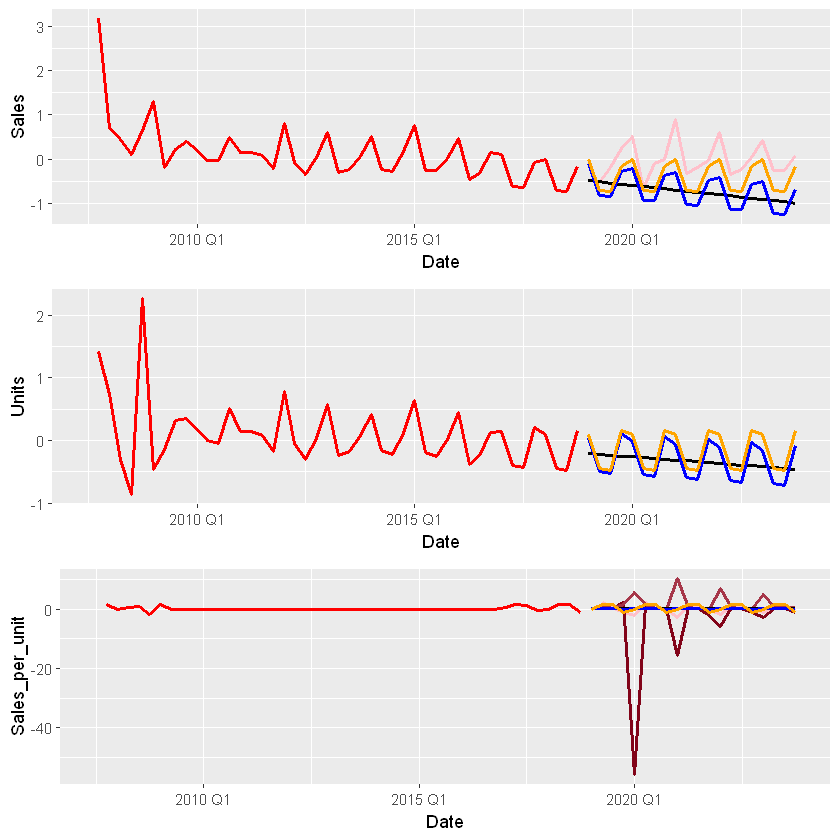

In [443]:
data_to_forecast <- data_to_forecast %>% mutate(Log_Diff_Sales = c(NA, diff(log(Sales))))
data_to_forecast$Sales <- data_to_forecast$Log_Diff_Sales
p1 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Sales), color = 'red',size=1) +
    geom_line(data = data_to_forecast, aes(x = Date, y = Sales), color= 'pink', size=1)+ ## Sales from the dataset
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_trend), color= 'black', size=1)+
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_seasonal_trend), color= 'blue', size=1)+
    geom_line(data =data_to_forecast, aes(x = Date, y = Forecasted_Sales_snaive), color= 'orange', size=1)
    
p2 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Units), color = 'red', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_trend), color= 'black', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_seasonal_trend), color= 'blue', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Units_snaive), color= 'orange', size=1)
    

p3 <- ggplot() +
    geom_line(data = data, aes(x = Date, y = Sales_per_unit), color = 'red', size=1)+
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_trend),color='pink',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_seasonal_trend),color='#820419',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = forecasted_data, aes(x = Date,y = Sales_per_unit_snaive),color='#a63649',size = 1) + ## Sales_per_unit using given sales and forecasted units
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_trend), color= 'black', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_seasonal_trend), color= 'blue', size=1)+
    geom_line(data = data_to_forecast, aes(x = Date, y = Forecasted_Sales_per_unit_snaive), color= 'orange', size=1)

data %>% head()

grid.arrange(p1,p2,p3,ncol=1)

the Seasonal Trend model may provide the most reliable forecast due to its consideration of both trend and seasonality, which are evident in the historical data.

#### Using Forecasted_data after the analysis from this approach

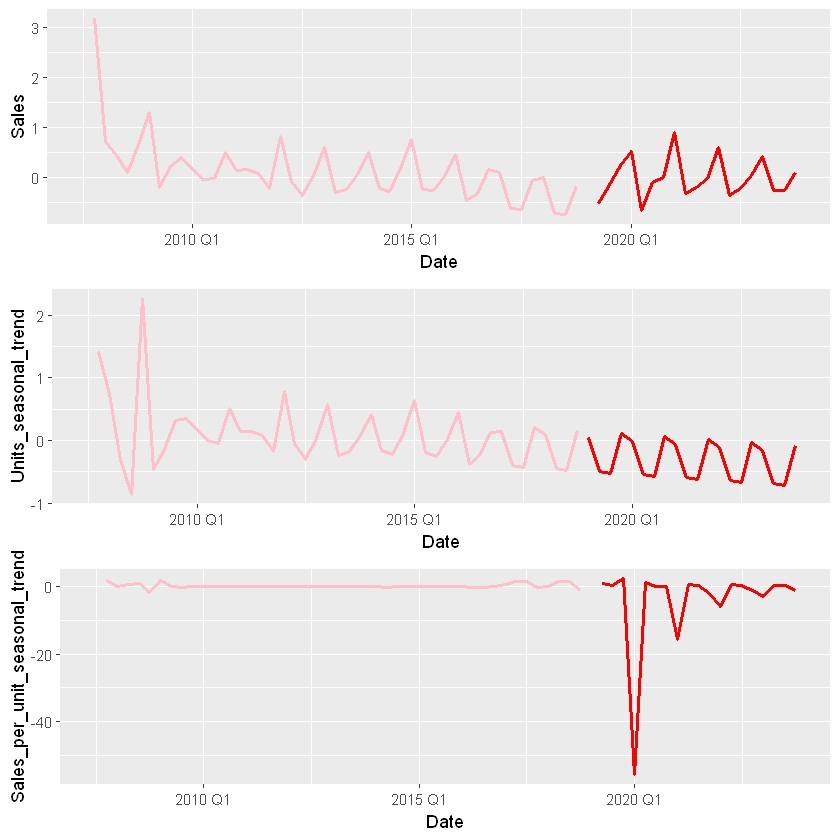

In [444]:
p1 <- ggplot() +
    geom_line(data = forecasted_data, aes(x = Date, y = Sales_per_unit_seasonal_trend), color = 'red',size=1)+
    geom_line(data = data, aes(x = Date, y = Sales_per_unit), color = 'pink',size=1)

p2 <- ggplot()+
    geom_line(data = forecasted_data, aes(x = Date, y = Units_seasonal_trend),color='red',size = 1)+
    geom_line(data = data, aes(x = Date, y = Units), color = 'pink', size = 1)

p3 <- ggplot()+
    geom_line(data = forecasted_data, aes(x = Date, y = Sales), color = 'red', size = 1)+
    geom_line(data = data, aes(x = Date, y = Sales), color = 'pink', size = 1)

grid.arrange(p3,p2,p1,ncol=1)

finalized_data <- forecasted_data %>% select(Date,Sales,Units_seasonal_trend,Sales_per_unit_seasonal_trend) %>% mutate(
    Units = `Units_seasonal_trend`,
    Sales_per_unit = `Sales_per_unit_seasonal_trend`
)
finalized_data <- finalized_data %>% select(-Units_seasonal_trend,-Sales_per_unit_seasonal_trend)
combined_df = rbind(data, finalized_data)

In [445]:
fit_sales <- ts(combined_df$Sales, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
fit_units <- ts(combined_df$Units, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))
fit_Sales_per_unit <- ts(combined_df$Sales_per_unit, frequency = 4) %>% as_tsibble(index=Date) %>% model(Trend = TSLM(value ~ trend()),`Seasonal Trend` = TSLM(value ~ trend() + season()),SNAIVE = SNAIVE(value))

frcst_sales <- fit_sales %>% forecast(h = 4) 
frcst_units <- fit_units %>% forecast(h = 4)
frcst_sales_per_unit <- fit_Sales_per_unit %>% forecast(h = 4)

future <- data.frame(Date = c('2024 Q1', '2024 Q2', '2024 Q3', '2024 Q4'))
# frcst_sales %>% as.data.frame() %>% filter(.model == 'Trend') %>% mutate(sales_trend = `.mean`) %>% select(sales_trend) %>% unlist()
future$sales_trend <- frcst_sales %>% as.data.frame() %>% filter(.model == 'Trend')  %>% mutate(sales_trend = `.mean`) %>% select(sales_trend) %>% unlist()
future$units_trend <- frcst_units %>% as.data.frame() %>% filter(.model == 'Trend') %>% mutate(units_trend = `.mean`) %>% select(units_trend) %>% unlist()
future$sales_per_unit_trend <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'Trend') %>% mutate(sales_per_unit_trend = `.mean`) %>% select (sales_per_unit_trend)%>% unlist()

# frcst_sales %>% as.data.frame() %>% filter(.model == 'Seasonal Trend') %>% select(.mean) %>% mutate(sales_seasonal_trend = `.mean`) %>% unlist()
future$sales_seasonal_trend <- frcst_sales %>% as.data.frame() %>% filter(.model == 'Seasonal Trend')  %>% mutate(sales_seasonal_trend = `.mean`) %>% select(sales_seasonal_trend) %>% unlist()
future$units_seasonal_trend <- frcst_units %>% as.data.frame() %>% filter(.model == 'Seasonal Trend') %>% mutate(units_seasonal_trend = `.mean`) %>%  select(units_seasonal_trend)%>% unlist()
future$sales_per_unit_seasonal_trend <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'Seasonal Trend')%>% mutate(sales_per_unit_seasonal_trend = `.mean`) %>% select(sales_per_unit_seasonal_trend) %>% unlist()


future$sales_snaive <- frcst_sales %>% as.data.frame() %>% filter(.model == 'SNAIVE')  %>% mutate(sales_snaive = `.mean`) %>% select(sales_snaive)%>% unlist()
future$units_snaive <- frcst_units %>% as.data.frame() %>% filter(.model == 'SNAIVE')  %>% mutate(units_snaive = `.mean`)%>% select(units_snaive) %>% unlist()
future$sales_per_unit_snaive <- frcst_sales_per_unit %>% as.data.frame() %>% filter(.model == 'SNAIVE')  %>% mutate(sales_per_unit_snaive = `.mean`)%>% select(sales_per_unit_snaive) %>% unlist()
future <- future %>% mutate(Date = yearquarter(as.yearqtr(Date, format = '%Y Q%q')))

In [446]:
str(future)
str(finalized_data)

'data.frame':	4 obs. of  10 variables:
 $ Date                         : qtr [1:4] 2024 Q1, 2024 Q2, 2024 Q3, 2024 Q4
   ..@ fiscal_start: num 1
 $ sales_trend                  : num  -0.291 -0.302 -0.314 -0.325
 $ units_trend                  : num  -0.451 -0.463 -0.476 -0.488
 $ sales_per_unit_trend         : num  -3.32 -3.39 -3.46 -3.52
 $ sales_seasonal_trend         : num  0.1671 -0.6306 -0.5698 -0.0811
 $ units_seasonal_trend         : num  -0.204 -0.734 -0.771 -0.137
 $ sales_per_unit_seasonal_trend: num  -7.74 -2.08 -2.22 -2.86
 $ sales_snaive                 : num  0.4338 -0.2479 -0.2578 0.0992
 $ units_snaive                 : num  -0.1555 -0.6851 -0.7227 -0.0883
 $ sales_per_unit_snaive        : num  -2.79 0.362 0.357 -1.123
'data.frame':	20 obs. of  4 variables:
 $ Date          : qtr [1:20] 2019 Q1, 2019 Q2, 2019 Q3, 2019 Q4, 2020 Q1, 2020 Q2, 2020 ...
   ..@ fiscal_start: num 1
 $ Sales         : num  NA -0.515 -0.178 0.25 0.517 ...
 $ Units         : num  0.03946 -0.4901

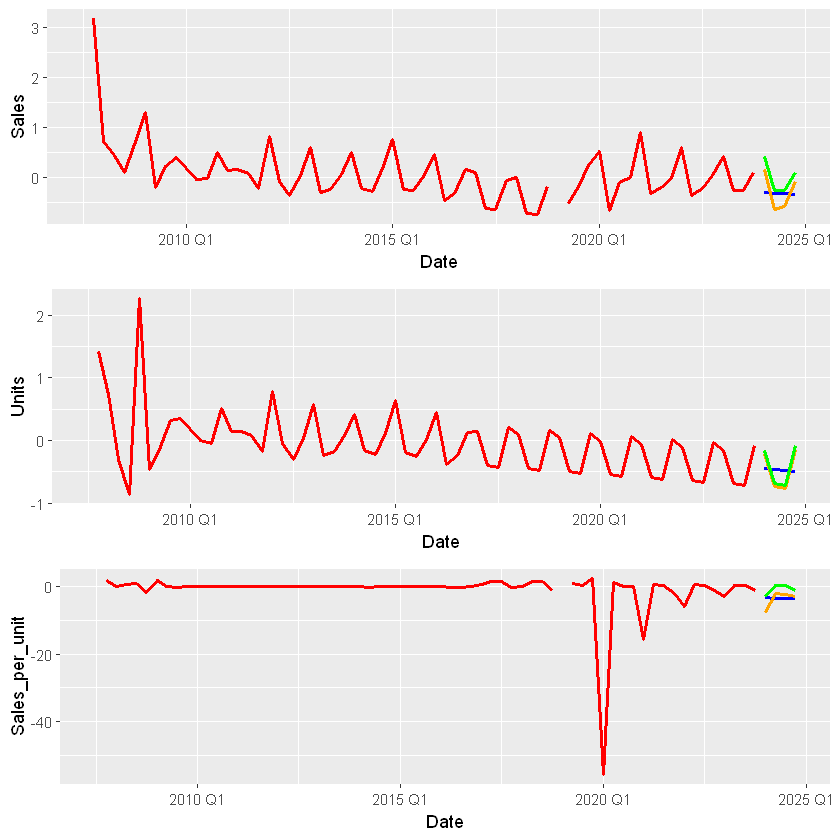

In [447]:
p1 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date, y = Sales),color = 'red', size = 1)+
    geom_line(data = future, aes(x = Date,y = sales_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_snaive), color = 'green', size = 1)
p2 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date, y = Units), color = 'red',size = 1)+
    geom_line(data = future, aes(x = Date,y = units_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = units_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = units_snaive), color = 'green', size = 1)

p3 <- ggplot()+
    geom_line(data = combined_df, aes(x = Date,y = Sales_per_unit),color= 'red', size = 1)+
    geom_line(data = future, aes(x = Date,y = sales_per_unit_trend), color = 'blue',size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_per_unit_seasonal_trend), color = 'orange', size = 1)+
    geom_line(data = future, aes(x = Date, y = sales_per_unit_snaive), color = 'green', size = 1)
grid.arrange(p1,p2,p3,ncol=1)

Based on the provided plot and previous information, the `Seasonal Trend` model appears to perform well, striking a balance between capturing the underlying trend and adjusting for seasonal fluctuations. In the plot, this model's forecasts (indicated in blue for trend and orange for seasonal adjustments) seem to align closely with historical data trends and seasonal patterns, suggesting its effectiveness in accounting for both long-term and cyclical changes. The seasonal trend model demonstrates adaptability to the sales cycles' peaks and troughs, which is crucial for accurate forecasting in data with strong seasonal components.

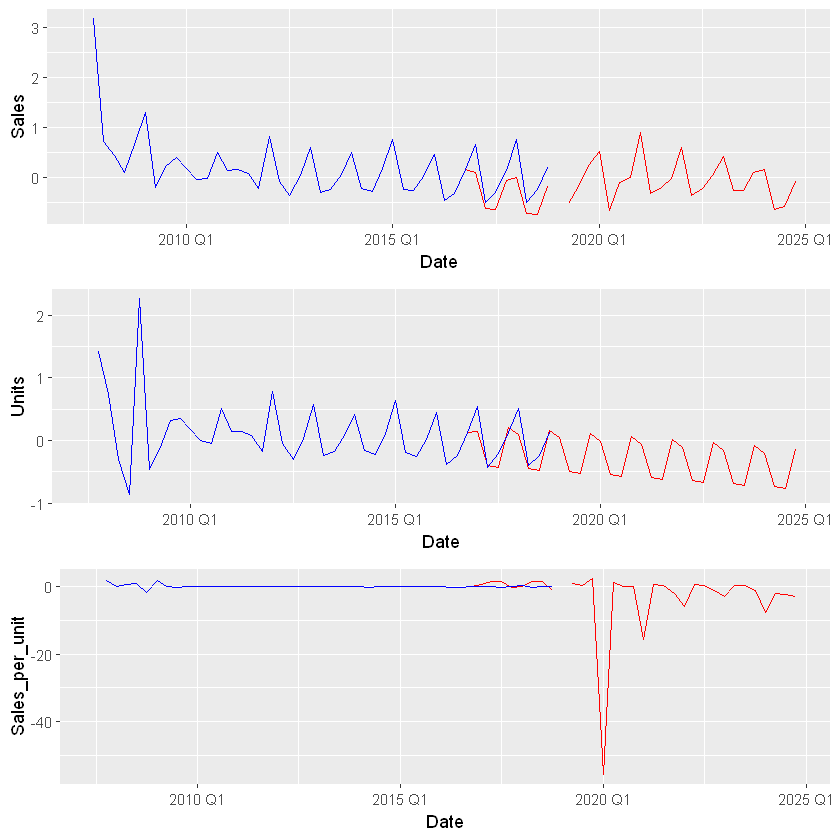

In [448]:
new_df_with_future_data <- future %>% 
    select(Date, sales_seasonal_trend,units_seasonal_trend,sales_per_unit_seasonal_trend) %>%
    mutate(Sales = `sales_seasonal_trend`,Units = `units_seasonal_trend`,Sales_per_unit =   `sales_per_unit_seasonal_trend`) %>%
    select(-sales_seasonal_trend,-units_seasonal_trend,-sales_per_unit_seasonal_trend)
    
    

final <- rbind(combined_df,new_df_with_future_data)
p1 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Sales),color = 'red') +
    geom_line(data = whole_data,aes(x = Date,y = Sales), color = 'blue')

p2 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Units),color = 'red') +
    geom_line(data = whole_data,aes(x = Date,y = Units), color = 'blue')

p3 <- ggplot()+
    geom_line(data = final,aes(x = Date,y = Sales_per_unit),color = 'red') +
    geom_line(data = whole_data,aes(x = Date,y = Sales_per_unit), color = 'blue')

grid.arrange(p1,p2,p3,ncol=1)

In [450]:
write.csv(final,'final1.csv')

In [451]:
original_data <- read.csv('iPhone_Sales.csv')
original_data <- original_data %>% mutate(Date = as.yearqtr(Time.Period)) %>% select(-Time.Period)

In [452]:
row_numbers_to_be_replaced <- which(original_data$Date >= as.yearqtr('2017 Q1') & original_data$Date <= as.yearqtr('2018 Q4'))
original_data$Units..millions.[row_numbers_to_be_replaced] <- final %>% filter(Date >= yearquarter('2017 Q1')) %>% filter(Date <= yearquarter('2018 Q4')) %>% select(Units) %>% unlist() %>% cumsum() %>% exp()
original_data$Sales.Per.Unit[row_numbers_to_be_replaced] <-  original_data$Sales....millions.[row_numbers_to_be_replaced]/ original_data$Units..millions.[row_numbers_to_be_replaced]

In [453]:
 row_numbers_to_be_replaced <- which(original_data$Date >= as.yearqtr('2019 Q1') )
 original_data$Units..millions.[row_numbers_to_be_replaced] <- final %>% filter(Date >= yearquarter('2019 Q1'))  %>% select(Units) %>% unlist() %>% cumsum() %>% exp()
 original_data$Sales.Per.Unit[row_numbers_to_be_replaced] <- original_data$Sales....millions.[row_numbers_to_be_replaced]/original_data$Units..millions.[row_numbers_to_be_replaced]

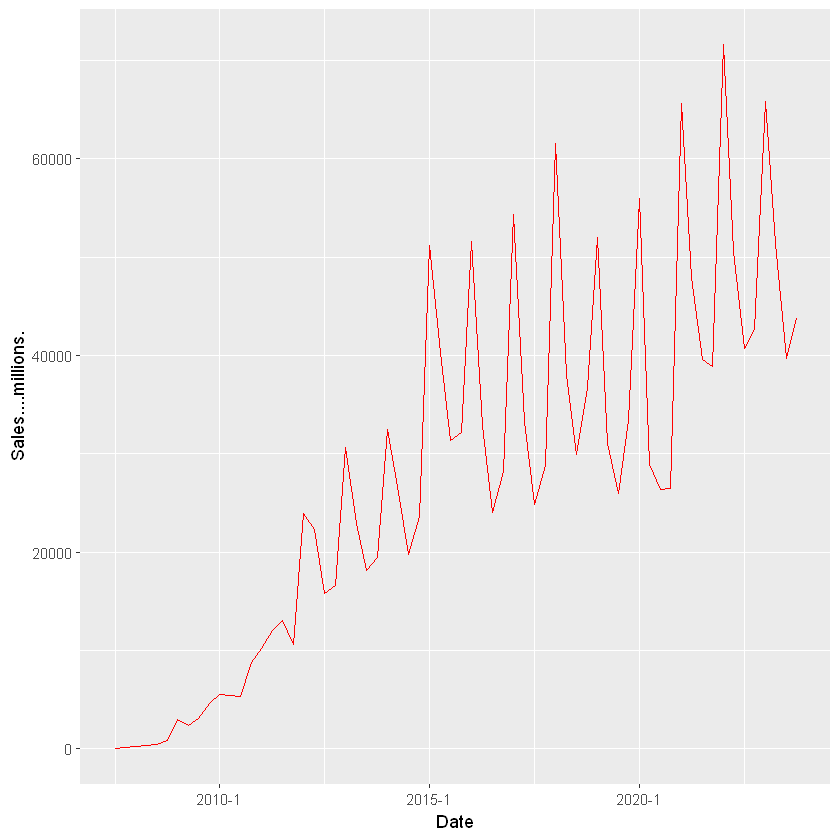

In [454]:
ggplot()+
geom_line(data = original_data, aes(x = Date, y = Sales....millions.),color = 'red')

In [455]:
original_data %>% tail()

,Sales....millions.,Units..millions.,Sales.Per.Unit,Date
,<int>,<dbl>,<dbl>,<yearqtr>
61,40665,0.009877917,4116759,2022 Q3
62,42626,0.009494989,4489315,2022 Q4
63,65775,0.008127608,8092787,2023 Q1
64,51334,0.004096469,12531281,2023 Q2
65,39669,0.001988555,19948659,2023 Q3
66,43805,0.001820538,24061565,2023 Q4
